## Lighthouse Labs
### W08D2 Deep Learning Architectures
Instructor: Socorro Dominguez  
November 03, 2020

**Agenda:**

* Different DL Architectures
    * CNN
        * Image Recognition
    * RNN
        * LSTM
    
* Best practices when designing a network

## Different DL Architectures

### Convolutional Neural Networks (CNN)

CNNs are widely used in computer vision problems. Their input is usually images and their output is usually probabilities of being something. 

A CNN is a special kind of FeedForward NN that reduces the number of parameters in a deep neural network with many units without losing too much in the quality of the model. 

In images, pixels that are close to one another usually have the same type of information: sky, water, leaves, etc. 

The exception from the rule are **the edges**: the parts of an image where two different objects “touch” one another.

We train the NN to recognize regions of the same information as well as the edges. This would allow the NN to predict the object represented in the image. 

For example, if the neural network detected multiple skin regions and edges that look like parts of an oval with skin-like tone on the inside and bluish tone on the outside, then it is likely that it’s a face on a sky background. 

If our goal is to detect people on pictures, the neural network will most likely succeed in predicting a person in this picture.

* The most important information in the image is local

We can split the image into square patches using a moving window approach. We can train multiple smaller regression models at once, each small regression model receiving a square patch as input. The goal of each small regression model is to learn to detect a specific kind of pattern in the input patch. 

For example, one small regression model will learn to detect the sky; another one will detect the grass, the third one will detect edges of a building, etc.

In CNNs, a small regression model looks like:

![img](img/01_CNN.png)


This only has the layer 1. 

To detect some pattern, a small regression model has to learn the parameters of a matrix F (for “filter”) of size p × p, where p is the size of a patch.


Let’s assume that the input image is black and white, with 1 representing black and 0 representing white pixels. Assume also that our patches are 3 by 3 pixels (p = 3). Some patch could then look like the following matrix P (for “patch”):

$$P = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

The previous patch represents a pattern that looks like a cross. 

The small regression model that will detect such patterns (and only them) would need to learn a 3 by 3 parameter matrix F where parameters at positions corresponding to the 1s in the input patch would be positive numbers, while the parameters in positions corresponding to 0s would be close to zero. 

If we calculate the convolution of matrices P and F, the value we obtain is higher the more similar F is to P. To illustrate the convolution of two matrices, assume that F looks like this:

$$F = \begin{bmatrix} 0 & 2 & 3 \\ 2 & 4 & 1 \\ 0 & 3 & 0 \end{bmatrix}$$

Then convolution operator is only defined for matrices that have the same number of rows and columns. For our matrices of P and F it’s calculated as illustrated below:

![convolution](img/02_Convolution.png)

If our patch had a different pattern, then the convolution with F would give a different result. 

*The more the patch “looks” like the filter, the higher the value of the convolution operation is*

For convenience, there’s also a bias parameter b associated with each filter F which is added to the result of a
convolution before applying the nonlinearity (activation function).

One layer of a CNN consists of multiple convolution filters (each with its own bias parameter).

Each filter of the first (leftmost) layer slides — or convolves — across the input image, left to right, top to bottom, and convolution is computed at each iteration.

Like this:

![convolv](img/03_Convolving.png)

If the CNN has one convolution layer following another convolution layer, then the subsequent layer *l + 1* treats the output of the preceding layer *l* as a collection of size *l* image matrices.

Hyperparameters:
* **Stride**
* **Padding**

**Pooling**

This is a technique very often used in CNNs. Pooling works in a way very similar to convolution, as a filter applied using amoving window approach. 

Instead of applying a trainable filter to an input matrix, a pooling layer applies a fixed operator, usually either max or average. 

Pooling's hyperparameters are also the size of the filter and the stride. 

Usually, a pooling layer follows a convolution layer, and it gets the output of convolution as input. 

Poolingdoesn’t have parameters to learn. It also contributes to the increased accuracy of the model and improves the speed of training by reducing the number of parameters of the neural network.
![pooling](img/04_Pooling.png)

### ReLU as Normalization Technique

After getting our new convolved matrix, turn anything negative to zero.

This removes unnecessary noise. 

## What a CNN looks like after all?

![img](img/05_FullCNN.png)

**Implementing Example in Keras**   

We'll move on to the famous the MNIST digits -- a classic dataset for deep learning. The MNIST data set is  bigger than the digits dataset built into sklearn: the images are larger ($28\times28$ instead of $8\times8$) and there are more of them ($70000$ insetad of $1797$). In total, we're dealing with $70000\times28\times28\approx 55$ million training pixels instead of $1797\times8\times8\approx80000$ training pixels (about $500$ times more data). 

The following code loads the MNIST dataset. The first time you run it, the data will be downloaded. In future times, it will use the local version.

*Close presentation view*


Also check FMNIST Fashion Example

In [41]:
import keras

# keras imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
import keras.datasets

# other imports
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

import time

In [43]:
# the data, shuffled and split between train and test sets
(X_train_img, y_train), (X_test_img, y_test) = keras.datasets.mnist.load_data()

In [44]:
X_train_img.shape

(60000, 28, 28)

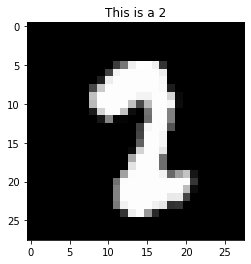

In [45]:
# display a random training example
i = np.random.randint(0,len(X_train_img))
plt.imshow(X_train_img[i],cmap='gray')
plt.title('This is a %d' % y_train[i]);

In [46]:
X_train = X_train_img.reshape(60000, 28*28)
X_test = X_test_img.reshape(10000, 28*28)
X_train = X_train / 255 # this is the same a scaling, since the pixel intensities range from 0 to 255
X_test = X_test / 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [47]:
batch_size = 128
num_classes = 10
epochs = 5

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

start_time = time.time()

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_train, Y_train, verbose=0)
print('Train accuracy:', score[1])

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

elapsed_time = time.time()-start_time
print("---Running Time: %s seconds ---" % elapsed_time)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2600 - accuracy: 0.9246 - val_loss: 0.1235 - val_accuracy: 0.9633
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9709 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.0737 - val_accuracy: 0.9763
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0457 - accuracy: 0.9852 - val_loss: 0.0714 - val_accuracy: 0.9790
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0927 - val_accuracy: 0.9717
Train accuracy: 0.987416684627533
Test accuracy: 0.9717000126838684
---Running Time: 10.694352149963379 seconds ---


### Recurrent Neural Networks

RNNs are used to label, classify, or generate sequences. 

A sequence is a matrix, each row of which is a feature vector and the order of rows matters.

To label a sequence is to predict a class for each feature vector in a sequence. To classify a sequence is to predict a class for the entire sequence. To generate a sequence is to output another sequence (of a possibly different length) somehow relevant to the input sequence.

RNNs are often used in text processing because sentences and texts are naturally sequences of either words and punctuation marks or sequences of characters. RNN's are also used in speech processing.

RNNs are not feed-forward: they contains loops. The idea is that each unit *u* of recurrent layer *l* has a real-valued state hl,u. 

The state can be seen as the memory of the unit. In RNN, each unit *u* in each layer *l* receives two inputs: a vector of states from the previous layer l − 1 and the vector of states from this same layer *l* from the previous time step.

Let’s consider the first and the second recurrent layers of an RNN. The first (leftmost) layer receives a feature vector as input. The second layer receives the output of the first layer as input.

![RNN](img/04_RNN.png)


Each training example is a matrix in which each row is a feature vector. 

In an RNN, the feature vectors from an input example are “read” by the NN sequentially in the order of the timesteps. 


The weights are computed from the training data using gradient descent with backpropagation. To train RNN models, a special version of backpropagation is used called backpropagation through time.

**Disadvantages**
* Most of the times, tanh and softmax are used but they both suffer from the vanishing gradient problem. 

* Even with only one or two recurrent layers, the longer is the input sequence, the deeper is the unfolded network.

* Long-term dependencies. As the length of the input sequence grows, the feature vectors from the beginning of the sequence tend to be “forgotten,” In text or speech processing, the cause-effect link between distant words in a long sentence can be lost.

The most effective RNN models used in practice are gated RNNs. These include the long short-term memory (**LSTM**) networks, which can store information in their units for future use, much like bits in a computer’s memory. 

The difference with the real memory is that reading, writing, and erasure of information stored in each unit is controlled by activation functions. 

The trained NN can “read” the input sequence of feature vectors and decide at some early time step t to keep specific information about the feature vectors. That information about the earlier feature vectors can later be used by the model to process the feature vectors from near the end of the input sequence. 

**Example:** If the input text starts with the word *she*, a language processing RNN model could decide to store the information about the gender to interpret correctly the word their seen later in the sentence.

Units make decisions about what information to store, and when to allow reads, writes, and erasures. Those decisions are learned from data and implemented through the concept of gates. 

Other important extensions to RNNs include bi-directional RNNs, RNNs with attention and sequence-to-sequence RNN models. The latter, in particular, are frequently used to build neural machine translation models and other models for text to text transformations.

**What do RNN's look like**
![rnn](img/06_RNN_viz.png)

![LSTM](img/07_LSTM.png)

**Building RNN's**

* Out of presentation mode

In [48]:
import sys, re
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from numpy import array

In [49]:
corpus = """ One , two , three , four , five 
Once I caught a fish alive . 
Six , seven , eight , nine , ten 
Then I let it go again . 
Why did you let it go ? 
Because it bit my finger so . 
Which finger did it bite ? 
This little finger on my right . """

In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
tokenizer.word_index

{'it': 1,
 'finger': 2,
 'i': 3,
 'let': 4,
 'go': 5,
 'did': 6,
 'my': 7,
 'one': 8,
 'two': 9,
 'three': 10,
 'four': 11,
 'five': 12,
 'once': 13,
 'caught': 14,
 'a': 15,
 'fish': 16,
 'alive': 17,
 'six': 18,
 'seven': 19,
 'eight': 20,
 'nine': 21,
 'ten': 22,
 'then': 23,
 'again': 24,
 'why': 25,
 'you': 26,
 'because': 27,
 'bit': 28,
 'so': 29,
 'which': 30,
 'bite': 31,
 'this': 32,
 'little': 33,
 'on': 34,
 'right': 35}

In [52]:
print('Corpus: ', corpus)
encoded = tokenizer.texts_to_sequences([corpus])[0]
print('\nTokenizer word index: ', tokenizer.word_index)
print('\nEncoded corpus: ', encoded)

Corpus:   One , two , three , four , five 
Once I caught a fish alive . 
Six , seven , eight , nine , ten 
Then I let it go again . 
Why did you let it go ? 
Because it bit my finger so . 
Which finger did it bite ? 
This little finger on my right . 

Tokenizer word index:  {'it': 1, 'finger': 2, 'i': 3, 'let': 4, 'go': 5, 'did': 6, 'my': 7, 'one': 8, 'two': 9, 'three': 10, 'four': 11, 'five': 12, 'once': 13, 'caught': 14, 'a': 15, 'fish': 16, 'alive': 17, 'six': 18, 'seven': 19, 'eight': 20, 'nine': 21, 'ten': 22, 'then': 23, 'again': 24, 'why': 25, 'you': 26, 'because': 27, 'bit': 28, 'so': 29, 'which': 30, 'bite': 31, 'this': 32, 'little': 33, 'on': 34, 'right': 35}

Encoded corpus:  [8, 9, 10, 11, 12, 13, 3, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 3, 4, 1, 5, 24, 25, 6, 26, 4, 1, 5, 27, 1, 28, 7, 2, 29, 30, 2, 6, 1, 31, 32, 33, 2, 34, 7, 35]


In [53]:
# Why add one? 
# To make it work with the embedding layer.
vocab_size = len(tokenizer.word_index) + 1
sequences = []

for i in range(1,len(encoded)):
    sequences.append(encoded[i-1:i+1])
sequences = array(sequences)

## Create X and y
X, y = sequences[:,0],sequences[:,1]
print('X: ', X)
print('\ny: ', y)

X:  [ 8  9 10 11 12 13  3 14 15 16 17 18 19 20 21 22 23  3  4  1  5 24 25  6
 26  4  1  5 27  1 28  7  2 29 30  2  6  1 31 32 33  2 34  7]

y:  [ 9 10 11 12 13  3 14 15 16 17 18 19 20 21 22 23  3  4  1  5 24 25  6 26
  4  1  5 27  1 28  7  2 29 30  2  6  1 31 32 33  2 34  7 35]


In [54]:
y = to_categorical(y, num_classes=vocab_size)

In [55]:
# Build and compile network 
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length = 1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             360       
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_7 (Dense)              (None, 36)                1836      
Total params: 14,396
Trainable params: 14,396
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=0)

In [30]:
seed = 'fish'
def print_next_word(seed):
  encoded = tokenizer.texts_to_sequences([seed])[0]
  encoded = array(encoded)
  yhat = model.predict_classes(encoded, verbose=0)

  for word, index in tokenizer.word_index.items():
    if index == yhat:
      print(word)

Check out Andre Karpathy's blog: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)